In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

/home/w_lander/anaconda3/envs/dowgrade/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Контекст
World Happiness Report — это знаменательное исследование состояния глобального счастья, в котором 156 стран ранжируются по тому, насколько счастливыми их граждане себя считают. В этом году World Happiness Report фокусируется на счастье и обществе: как изменилось счастье за ​​последние двенадцать лет, с акцентом на технологиях, социальных нормах, конфликтах и ​​государственной политике, которые привели к этим изменениям.

Содержание
Что такое антиутопия?

Dystopia — это воображаемая страна, в которой живут самые несчастливые люди в мире. Целью создания Dystopia является создание эталона, с которым все страны можно было бы выгодно сравнить (ни одна страна не показала худших результатов, чем Dystopia) по каждой из шести ключевых переменных, что позволяет каждой подполосе иметь положительную (или нулевую, в шести случаях) ширину. Таким образом, самые низкие баллы, наблюдаемые для шести ключевых переменных, характеризуют Dystopia. Поскольку жизнь была бы очень неприятной в стране с самыми низкими в мире доходами, самой низкой продолжительностью жизни, самой низкой щедростью, самой большой коррупцией, самой низкой свободой и самой низкой социальной поддержкой, ее называют «Dystopia», в отличие от Utopia.

Каковы остатки?

Остатки или необъясненные компоненты различаются для каждой страны, отражая степень, в которой шесть переменных либо пере-, либо недообъясняют средние оценки жизни за 2016-2018 годы. Эти остатки имеют среднее значение приблизительно равное нулю по всему набору стран. На рисунке 2.7 показан средний остаток для каждой страны, если уравнение в таблице 2.1 применяется к средним данным за 2016-2018 годы для шести переменных в этой стране. Мы объединяем эти остатки с оценкой оценок жизни в Dystopia, так что объединенная полоса всегда будет иметь положительные значения. Как видно на рисунке 2.7, хотя некоторые остатки оценки жизни довольно велики, иногда превышая один пункт по шкале от 0 до 10, они всегда намного меньше расчетного значения в Dystopia, где средняя жизнь оценивается в 1,88 по шкале от 0 до 10. В таблице 7 онлайн-статистического приложения 1 к главе 2 блок «Дистопия плюс остаток» помещен слева, а также проведена линия «Дистопия», что позволяет легко сравнивать знаки и размеры остатков в разных странах.

Почему мы используем эти шесть факторов для объяснения оценок жизни?

Используемые переменные отражают то, что, как было широко установлено в исследовательской литературе, важно для объяснения различий в оценках жизни на национальном уровне. Некоторые важные переменные, такие как безработица или неравенство, не отображаются, поскольку сопоставимые международные данные еще не доступны для полной выборки стран. Переменные предназначены для иллюстрации важных линий корреляции, а не для отражения чистых причинно-следственных оценок, поскольку некоторые данные взяты из одних и тех же источников опросов, некоторые коррелируют друг с другом (или с другими важными факторами, для которых у нас нет измерений), и в нескольких случаях, вероятно, существуют двусторонние связи между оценками жизни и выбранными переменными (например, здоровые люди в целом счастливее, но, как показано в Главе 4 Доклада о мировом счастье 2013 года, более счастливые люди в целом здоровее). В Статистическом приложении 1 Доклада о мировом счастье 2018 года мы оценили возможную важность использования пояснительных данных от тех же людей, чьи оценки жизни объясняются. Мы сделали это, случайным образом разделив выборки на две группы и используя средние значения для .eg свободы, полученные от одной группы, чтобы объяснить оценки жизни другой группы. Это снизило эффекты, но лишь очень незначительно (например, от 2% до 3%), что убедило нас в том, что использование данных от тех же людей не оказывает серьезного влияния на результаты.

In [2]:
# 'Country or region'            - Страна или регион
# 'Score'                        - Оценка
# 'GDP per capita'               - ВВП на душу населения
# 'Social support'               - Социальная поддержка
# "Healthy life expectancy'      - Продолжительность здоровой жизни
# 'Freedom to make life choices' - Свобода делать жизненный выбор
# 'Generosity'                   - Щедрость
# 'Perceptions of corruption'    - Представления о коррупции

In [3]:
df_happy = pd.read_csv('data/world_happiness_report_2019.csv', index_col='Overall rank')
df_happy.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,,,,,,,,
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Используя датасет «World Happiness Report 2019», изучите взаимосвязи между различными факторами, которые влияют на уровень счастья в разных странах.

Задание 1: Анализ корреляции между ВВП на душу населения и оценкой счастья.
Используйте коэффициент Пирсона для определения взаимосвязи между ВВП на душу населения и оценками счастья.

In [4]:
df_happy.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [5]:
df_happy.duplicated().sum()

0

In [6]:
# Вычисляем коэффициент кореляции Пирсона
import scipy.stats as stats
corr_coeff, p_value = stats.pearsonr(df_happy['GDP per capita'], df_happy['Score'])

print(f'Коэффициент корреляции Пирсона: {corr_coeff}')
print(f'P-значение: {p_value}')

Коэффициент корреляции Пирсона: 0.7938828678781275
P-значение: 4.315480913319406e-35


Коэффициент корреляции Пирсона равен 0.793 говорит о сильной статистической значимости результатов. P-значение равное 4.315 значение больше стандартного порога в 0.05 для статистической значимости, мы можем сказать, что существует сильная статистически значимая корреляция между ВВП на душу населения и обшей оценкой.

Коэффициент Пирсона (Pearson's r)* - Самый распространенный и широко используемый коэффициент корреляции.
* Измеряет линейную зависимость между двумя количественными переменными.
* Может колебаться от -1 (полная отрицательная корреляция) до 1 (полная положительная корреляция).

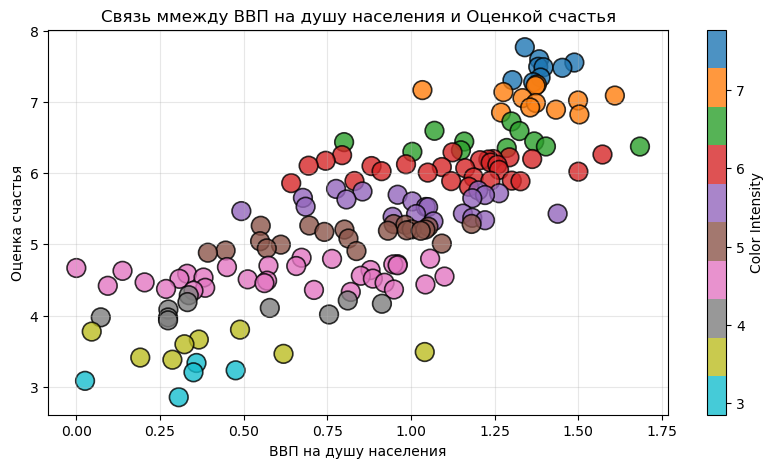

Чем больше ВВП, тем выше Оценка счастья


In [7]:
# Построение графика рассеивания
plt.figure(figsize=(10,5))
plt.scatter(data=df_happy, x=df_happy['GDP per capita'], c=df_happy['Score'], y='Score',alpha=0.8, linewidths=1.2, s=180, edgecolors='k', cmap='tab10_r')

plt.title('Связь ммежду ВВП на душу населения и Оценкой счастья')
plt.xlabel('ВВП на душу населения')
plt.ylabel('Оценка счастья')
plt.colorbar(label='Color Intensity')
plt.grid(alpha=0.3)

plt.show()
print('Чем больше ВВП, тем выше Оценка счастья')

Задание 2: Исследование влияния социальной поддержки на оценку счастья.
* Примените коэффициент Спирмена для анализа отношений между социальной поддержкой и оценками счастья.

In [8]:
# Вычисляем коэффициент кореляции Пирсона

corr_coeff, p_value = stats.spearmanr(df_happy['Social support'], df_happy['Score'])

print(f'Коэффициент корреляции Пирсона: {corr_coeff}')
print(f'P-значение: {p_value}')

Коэффициент корреляции Пирсона: 0.8161807357057258
P-значение: 1.613098226311642e-38


Коэффициент корреляции Спирмена равен 0.816 говорит о сильной статистической значимости результатов. P-значение равное 1.613 значение больше стандартного порога в 0.05 для статистической значимости, мы можем сказать, что существует сильная статистически значимая корреляция между Социальной поддержкой и обшей оценкой.

Коэффициент Спирмена (Spearman's rho). - 
* Используется для измерения силы монотонной взаимосвязи между двумя переменными.
* Не требует нормального распределения данных и может использоваться с ранговыми данными.


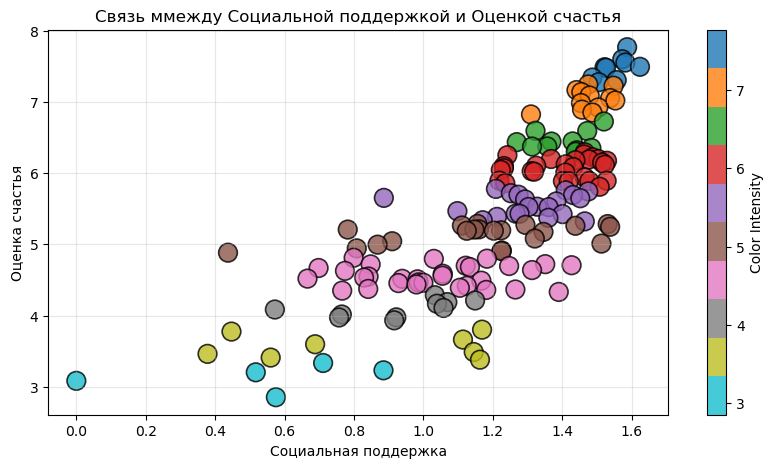

Чем больше больше Социальная поддержка, тем выше Оценка счастья


In [9]:
# Построение графика рассеивания
plt.figure(figsize=(10,5))
plt.scatter(data=df_happy, x=df_happy['Social support'], c=df_happy['Score'], y='Score',alpha=0.8, linewidths=1.2, s=180, edgecolors='k', cmap='tab10_r')

plt.title('Связь ммежду Социальной поддержкой и Оценкой счастья')
plt.xlabel('Социальная поддержка')
plt.ylabel('Оценка счастья')
plt.colorbar(label='Color Intensity')
plt.grid(alpha=0.3)

plt.show()
print('Чем больше больше Социальная поддержка, тем выше Оценка счастья')

In [10]:
corr_sign = df_happy[['Social support', 'Score']]
corr_matrix = corr_sign.corr(method='spearman')

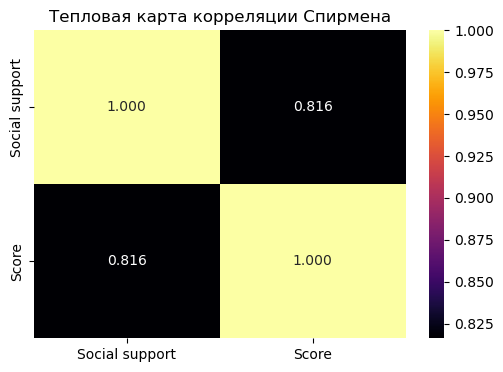

In [11]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='inferno')
plt.title('Тепловая карта корреляции Спирмена')
plt.show()

Задание 3: Взаимосвязь между продолжительностью здоровой жизни и оценками счастья.
* Используйте коэффициент корреляции Кэнделла для изучения связи между ожидаемой продолжительностью здоровой жизни и уровнем счастья.

Коэффициент Кендалла (Kendall's tau)*. - Также измеряет силу монотонной взаимосвязи между переменными.
* Чувствителен к выбросам в данных и показывает, насколько часто конкретные значения одной переменной связаны с конкретными значениями другой переменной.

Коэффициент корреляции Кэнделла выбран для анализа, так как он позволяет изучить монотонные взаимосвязи между Продолжительностью здоровой жизни и Оценкой счастья переменными без предположения о линейности связи или равномерности шкал. Визуализация данных с помощью графика рассеивания поможет наглядно определить, как распределяются данные и подтверждает ли визуальное наблюдение результаты расчета коэффициента Кэнделла.

In [12]:
# Вычисляем коэффициент кореляции Кендалла

corr_coeff, p_value = stats.kendalltau(df_happy['Healthy life expectancy'], df_happy['Score'])

print(f'Коэффициент корреляции Пирсона: {corr_coeff}')
print(f'P-значение: {p_value}')

Коэффициент корреляции Пирсона: 0.6026128531700047
P-значение: 8.000780684230196e-29


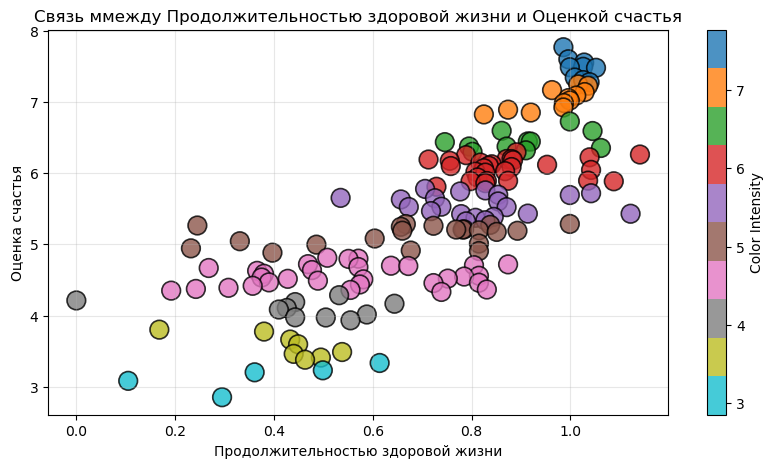

Чем больше больше Продолжительность здоровой жизни, тем выше Оценка счастья


In [13]:
# Построение графика рассеивания
plt.figure(figsize=(10,5))
plt.scatter(data=df_happy, x=df_happy['Healthy life expectancy'], c=df_happy['Score'], y='Score',alpha=0.8, linewidths=1.2, s=180, edgecolors='k', cmap='tab10_r')

plt.title('Связь ммежду Продолжительностью здоровой жизни и Оценкой счастья')
plt.xlabel('Продолжительностью здоровой жизни')
plt.ylabel('Оценка счастья')
plt.colorbar(label='Color Intensity')
plt.grid(alpha=0.3)

plt.show()
print('Чем больше больше Продолжительность здоровой жизни, тем выше Оценка счастья')

Задание 4: Свобода делать жизненный выбор и уровень счастья.
* Проанализируйте, используя коэффициент корреляции Пирсона, как свобода делать жизненный выбор влияет на уровень счастья.

In [14]:
# Вычисляем коэффициент кореляции Пирсона

corr_coeff, p_value = stats.spearmanr(df_happy['Freedom to make life choices'], df_happy['Score'])

print(f'Коэффициент корреляции Пирсона: {corr_coeff}')
print(f'P-значение: {p_value}')

Коэффициент корреляции Пирсона: 0.5519742183297274
P-значение: 8.088254645756598e-14


Коэффициент корреляции Спирмена равен 0.55197 говорит о статистической значимости результатов. P-значение равное 8.088 значение больше стандартного порога в 0.05 для статистической значимости, мы можем сказать, что существует статистически значимая корреляция между Свободой делать жизненный выбор и обшей оценкой.

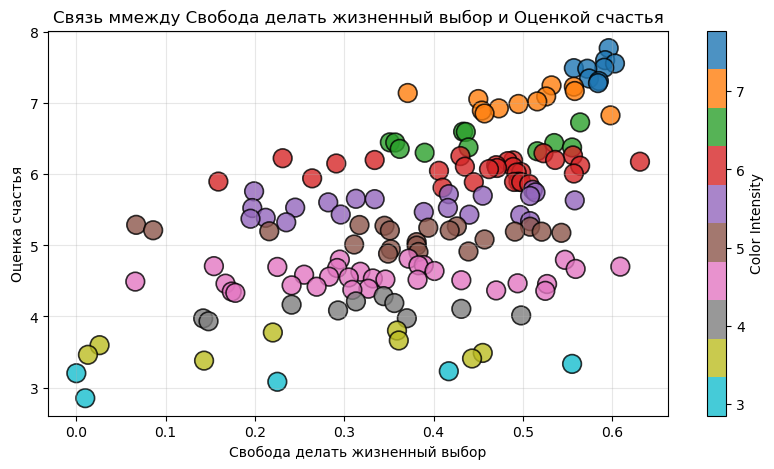

Чем больше больше Свободы делать жизненный выбор, тем выше Оценка счастья


In [15]:
# Построение графика рассеивания
plt.figure(figsize=(10,5))
plt.scatter(data=df_happy, x=df_happy['Freedom to make life choices'], c=df_happy['Score'], y='Score',alpha=0.8, linewidths=1.2, s=180, edgecolors='k', cmap='tab10_r')

plt.title('Связь ммежду Свобода делать жизненный выбор и Оценкой счастья')
plt.xlabel('Свобода делать жизненный выбор')
plt.ylabel('Оценка счастья')
plt.colorbar(label='Color Intensity')
plt.grid(alpha=0.3)

plt.show()
print('Чем больше больше Свободы делать жизненный выбор, тем выше Оценка счастья')

Вопросы для обсуждения:
* Какой из факторов наиболее сильно связан с уровнем счастья в анализируемых странах? 
* В чем может заключаться причина такой взаимосвязи?

### Построим матрицу корреляции для выявления линейной зависимоти

In [16]:
# подготовим признаки
df_corr = df_happy.select_dtypes(include=('float64'))

In [17]:
corr_matrix = df_corr.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

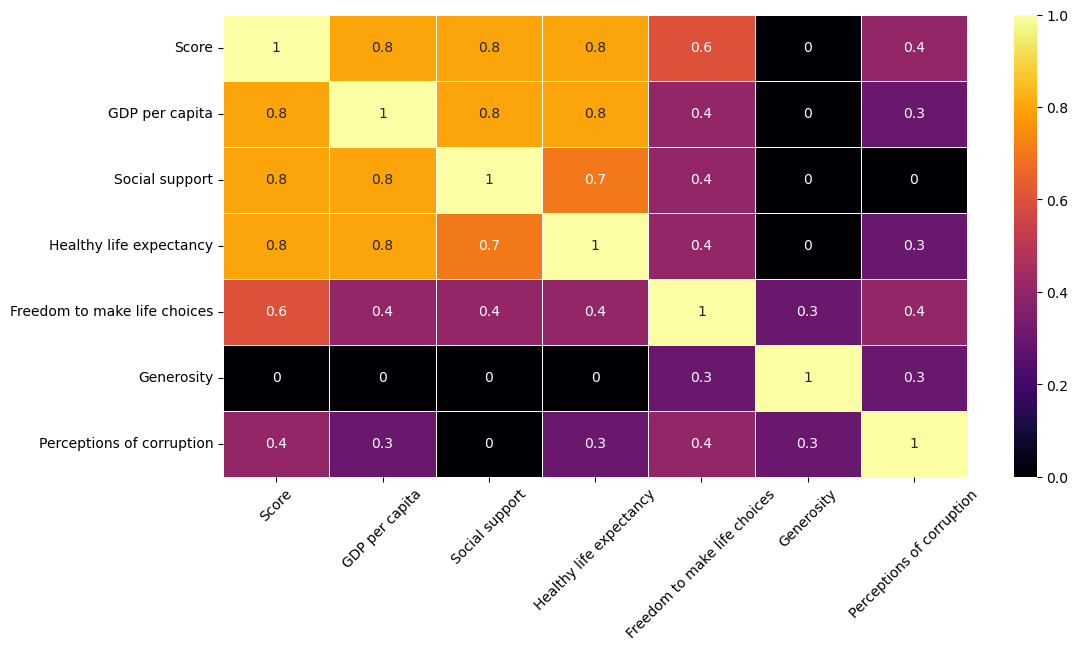

In [18]:
plt.figure(figsize=(12, 6))

sns.heatmap(corr_matrix, annot=True, linewidths=0.7, cmap='inferno')
plt.xticks(rotation=45)
#plt.yticks(rotation=35)
plt.show()

Признакаи наиболее сильно связаны с уровнем счастья следующие:
* Коэффициент 0.8 - 'GDP per capita' - ВВП сильно влияет на Оценку счастья
* Коэффициент 0.8 - 'Social support' - Высокий уровень Социальной поддержки положительно влияет на Оценку счастья
* Коэффициент 0.8 - 'Healthy life expectancy' - Чем выше Продолжительность здоровой жизни, тем больше Оценка счастья
* Коэффициент 0.6 - 'Freedom to make life choices' - Свобода делать жизненный выбор, также положительно влияет на Оценку счастья